<a href="https://colab.research.google.com/github/rehan-kapadia/Trading/blob/main/RL_Stock_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install shimmy

In [4]:
pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

[*********************100%***********************]  1 of 1 completed
<ipython-input-9-11b200754013>:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 251.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 251      |
|    mean_reward      | 0        |
| rollout/            |          |
|    exploration_rate | 0.525    |
| time/               |          |
|    total_timesteps  | 1000     |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=4829.60 +/- 0.00
Episode length: 251.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 251      |
|    mean_reward      | 4.83e+03 |
| rollout/            |          |
|    exploration_rate | 0.0505   |
| time/               |          |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.362    |
|    n_updates        | 249      |
----------------------------------
New best mean reward!
Eval num_ti

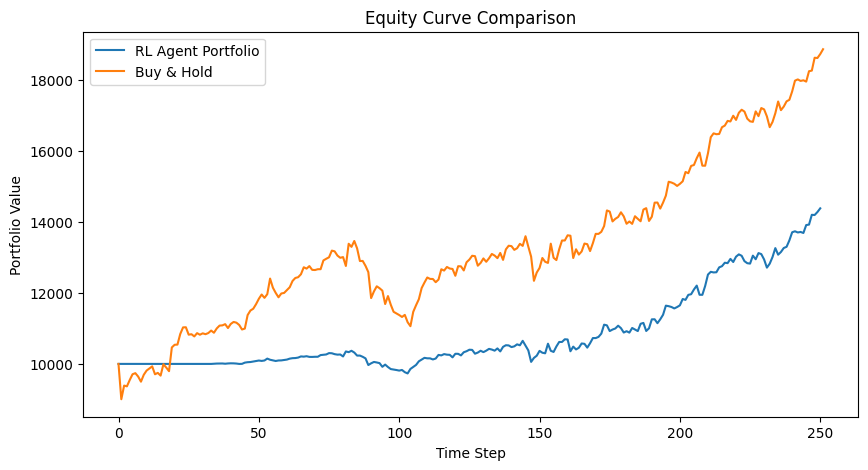

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback

# ----------------------------
# 1. Data Retrieval & Preprocessing
# ----------------------------
def get_stock_data(ticker="AAPL", start="2010-01-01", end="2020-01-01"):
    data = yf.download(ticker, start=start, end=end, multi_level_index=False)

    # Check if data is empty
    if data.empty:
        raise ValueError("Downloaded data is empty.")

    # Calculate technical indicators using the 'Close' price
    data['Return'] = data['Close'].pct_change()
    data['MA_5'] = data['Close'].rolling(window=5).mean()
    data['MA_20'] = data['Close'].rolling(window=20).mean()
    data['Std_20'] = data['Close'].rolling(window=20).std()

    # Calculate RSI 14-day using the 'Close' price
    delta = data['Close'].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    avg_gain = up.rolling(14).mean()
    avg_loss = down.rolling(14).mean()
    rs = avg_gain / avg_loss
    data['RSI_14'] = 100 - (100 / (1 + rs))

    data.fillna(method='ffill', inplace=True)
    data.dropna(inplace=True)
    return data

# ----------------------------
# 2. Custom Trading Environment
# ----------------------------
class StockTradingEnv(gym.Env):
    """
    A custom environment for stock trading that follows the OpenAI Gym interface.
    State: [price, MA_5, MA_20, Std_20, RSI_14, shares, normalized_cash]
    Actions: 0 = Hold, 1 = Buy, 2 = Sell
    Reward: Change in portfolio value after deducting transaction fees.
    """
    def __init__(self, df, initial_cash=10000, transaction_cost_pct=0.001):
        super(StockTradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)  # Reset index for proper iteration
        self.initial_cash = initial_cash
        self.transaction_cost_pct = transaction_cost_pct

        # Action space: 0 = Hold, 1 = Buy, 2 = Sell
        self.action_space = spaces.Discrete(3)
        # Observation space: [Close, MA_5, MA_20, Std_20, RSI_14, shares, cash/initial_cash]
        self.obs_shape = (7,)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=self.obs_shape, dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.cash = self.initial_cash
        self.shares = 0
        self.portfolio_value = self.initial_cash
        return self._get_obs()

    def _get_obs(self):
        row = self.df.iloc[self.current_step]
        price = row['Close']
        obs = np.array([
            price,
            row['MA_5'],
            row['MA_20'],
            row['Std_20'],
            row['RSI_14'],
            self.shares,
            self.cash / self.initial_cash  # Normalize cash
        ], dtype=np.float32)
        return obs

    def step(self, action):
        assert self.action_space.contains(action)
        done = False
        info = {}
        price = self.df.iloc[self.current_step]['Close']
        prev_value = self.cash + self.shares * price
        reward = 0.0

        # Execute action
        if action == 1:  # Buy
            if self.cash > price:
                shares_to_buy = 1
                if self.cash < price * shares_to_buy:
                    shares_to_buy = int(self.cash // price)
                if shares_to_buy > 0:
                    cost = shares_to_buy * price
                    fee = cost * self.transaction_cost_pct
                    self.cash -= (cost + fee)
                    self.shares += shares_to_buy
                    reward -= fee
        elif action == 2:  # Sell
            if self.shares > 0:
                shares_to_sell = self.shares
                proceeds = shares_to_sell * price
                fee = proceeds * self.transaction_cost_pct
                self.cash += (proceeds - fee)
                self.shares -= shares_to_sell
                reward -= fee
        # For Hold (action == 0), do nothing

        self.current_step += 1
        if self.current_step >= len(self.df) - 1:
            done = True

        new_price = self.df.iloc[self.current_step]['Close'] if not done else price
        new_value = self.cash + self.shares * new_price
        reward += (new_value - prev_value)
        self.portfolio_value = new_value

        return self._get_obs() if not done else np.zeros(self.obs_shape, dtype=np.float32), reward, done, info

# ----------------------------
# 3. Main: Training & Evaluation
# ----------------------------
if __name__ == '__main__':
    # Load and prepare data
    data = get_stock_data("AAPL", "2010-01-01", "2020-01-01")
    train_data = data[:'2018-12-31']
    test_data = data['2019-01-01':]

    # Create environments for training and evaluation
    train_env = StockTradingEnv(train_data)
    test_env = StockTradingEnv(test_data)

    # Define RL model using DQN with a two-layer MLP network
    policy_kwargs = dict(net_arch=[128, 128])
    model = DQN("MlpPolicy", train_env, learning_rate=1e-3, buffer_size=10000,
                learning_starts=1000, batch_size=32, gamma=0.99,
                target_update_interval=500, policy_kwargs=policy_kwargs, verbose=1)

    # Optional: Add an evaluation callback (evaluates every 1000 timesteps)
    eval_callback = EvalCallback(test_env, best_model_save_path='./logs/',
                                 log_path='./logs/', eval_freq=1000,
                                 deterministic=True, render=False)

    # Train the RL agent
    model.learn(total_timesteps=20000, callback=eval_callback)
    model.save("dqn_trading_agent")

    # ----------------------------
    # 4. Evaluation (Backtesting)
    # ----------------------------
    obs = test_env.reset()
    done = False
    portfolio_values = []

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = test_env.step(int(action))
        # Record the portfolio value after each action
        current_price = (test_env.df.iloc[test_env.current_step]['Close']
                         if test_env.current_step < len(test_env.df)
                         else test_env.df.iloc[-1]['Close'])
        portfolio_values.append(test_env.cash + test_env.shares * current_price)

    portfolio_values = np.array(portfolio_values)
    profit = portfolio_values[-1] - test_env.initial_cash
    returns = pd.Series(portfolio_values).pct_change().dropna()
    sharpe = (returns.mean() / returns.std()) * np.sqrt(252)  # Annualized Sharpe ratio assuming 252 trading days

    # Calculate maximum drawdown
    peak = portfolio_values[0]
    max_dd = 0.0
    for value in portfolio_values:
        if value > peak:
            peak = value
        drawdown = (peak - value) / peak
        if drawdown > max_dd:
            max_dd = drawdown

    print(f"Test Profit: ${profit:.2f}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_dd*100:.2f}%")

    # Buy-and-Hold Benchmark: Scale buy & hold to the same initial cash
    buy_hold_curve = test_data['Close'] / test_data['Close'].iloc[0] * test_env.initial_cash

    plt.figure(figsize=(10, 5))
    plt.plot(portfolio_values, label="RL Agent Portfolio")
    plt.plot(buy_hold_curve.values, label="Buy & Hold")
    plt.title("Equity Curve Comparison")
    plt.xlabel("Time Step")
    plt.ylabel("Portfolio Value")
    plt.legend()
    plt.show()
